In [6]:
import pandas as pd

In [7]:
#Data for the example
Marks_data=[ [101,80,99,100,'A'],
[102,87,76,79,'B'],
[103,80,80,81,'B'],
[104,65,60,70,'C']
]

Marks=pd.DataFrame(data=Marks_data, columns=['StudentID','Mark1','Mark2','Mark3','FinalGrade'])

In [8]:
Student_data=[[101,1],
[102,1],
[103,2],
[104,1]
]

Student=pd.DataFrame(data=Student_data, columns=['StudentID','Class'])

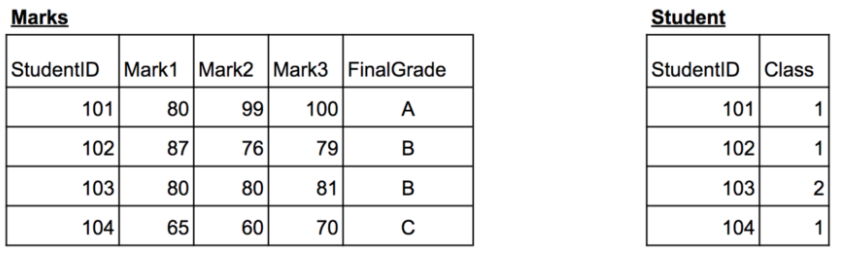

In [9]:
#Example - Simple Average
Marks.assign(TotalMarks=Marks.Mark1+Marks.Mark2+Marks.Mark3).loc[Marks.FinalGrade.isin(['B','C']),['FinalGrade','TotalMarks']].groupby('FinalGrade').agg({'TotalMarks':'mean'}).rename(columns={'TotalMarks':'avgTotalMarks'})

,avgTotalMarks
FinalGrade,
B,241.5
C,195.0


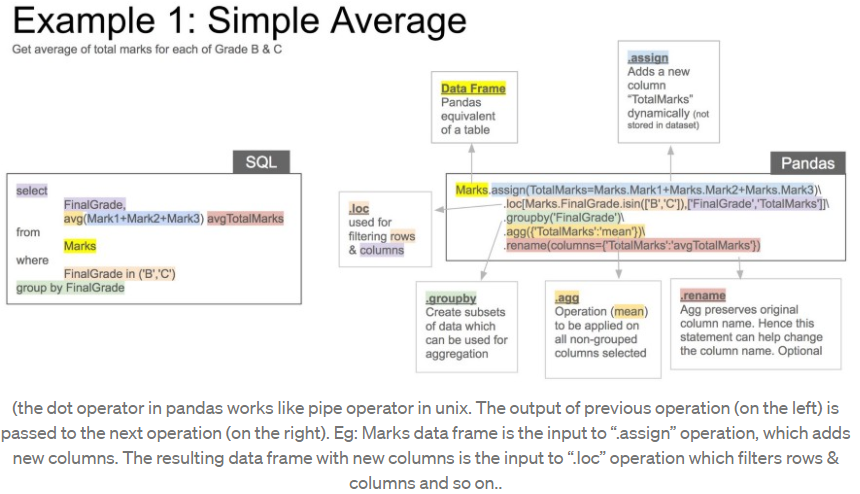

In [10]:
#Example2: Joins & Having
Marks.merge(Student, how='inner', left_on='StudentID', right_on='StudentID').sort_values('Mark1').groupby('Class').nth(0)

,StudentID,Mark1,Mark2,Mark3,FinalGrade
Class,,,,,
1,104,65,60,70,C
2,103,80,80,81,B


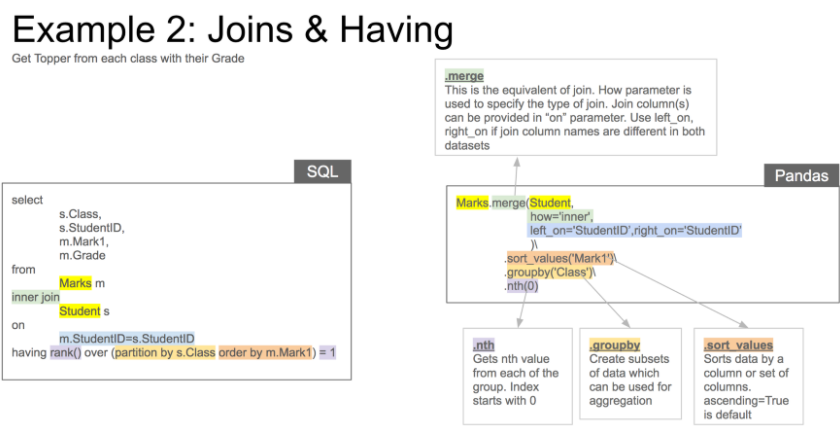

In [12]:
#Example 3: Window Function
pd.concat([Marks[['StudentID','Mark1']],  #df1: unaggregated fields
          Marks[['Mark1']].expanding().sum(),  #df2: cumm sum
          Marks[['Mark1']].expanding().sum()/(Marks.Mark1.sum())  #df3: cumm total
          ],axis=1)

,StudentID,Mark1,Mark1,Mark1
0,101,80,80.0,0.256410
1,102,87,167.0,0.535256
2,103,80,247.0,0.791667
3,104,65,312.0,1.000000


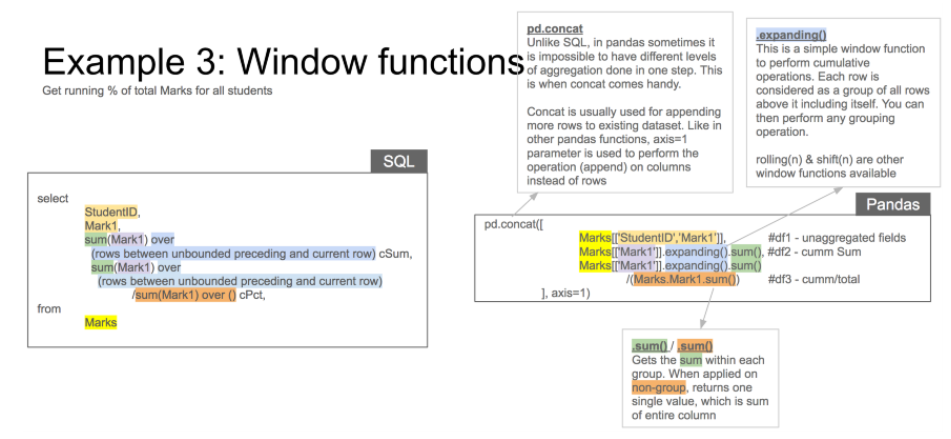